In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
all_df=pd.read_csv('Concrete_Data.csv', index_col=False)
all_df.head()

,ID,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1000,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1001,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,1002,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,1003,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,1004,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
all_df.drop('ID', axis=1, inplace=True)
all_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(all_df)

      cement   blast_furnace_slag  fly_ash  water  superplasticizer  \
0       540.0                 0.0      0.0  162.0               2.5   
1       540.0                 0.0      0.0  162.0               2.5   
2       332.5               142.5      0.0  228.0               0.0   
3       332.5               142.5      0.0  228.0               0.0   
4       198.6               132.4      0.0  192.0               0.0   
...       ...                 ...      ...    ...               ...   
1025    276.4               116.0     90.3  179.6               8.9   
1026    322.2                 0.0    115.6  196.0              10.4   
1027    148.5               139.4    108.6  192.7               6.1   
1028    159.1               186.7      0.0  175.6              11.3   
1029    260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate   fine_aggregate  age  concrete_compressive_strength  
0                1040.0           676.0   28                         

In [5]:
X = all_df.drop('concrete_compressive_strength', axis=1)

<AxesSubplot:>

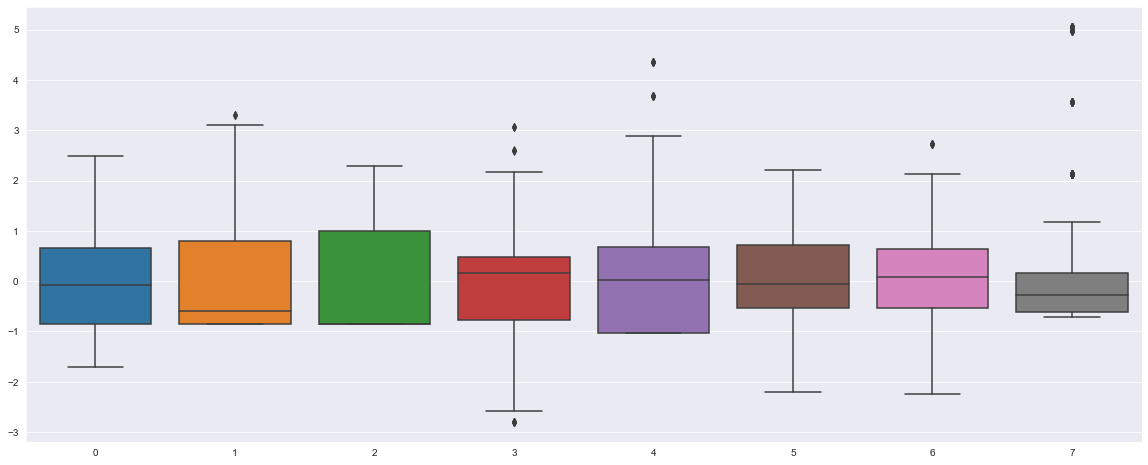

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

In [7]:
# assign numerical label to y
y = all_df['concrete_compressive_strength']

In [8]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
random_state=1)

In [9]:
print(type(Xs_test))

<class 'numpy.ndarray'>


## Decision Tree (Regression)

### Import, Initiate, and Train

In [10]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(Xs_train, y_train)

DecisionTreeRegressor()

### Predict

In [11]:
DTR_y_pred = decision_tree_regressor.predict(Xs_test)

### Some (possibly not very helpful - i.e. the tree is too complex to visualise!) visualisations

#### first visualisation is actually more text than vis...

In [12]:
from sklearn.tree import export_text
text_representation = export_text(decision_tree_regressor, feature_names=X.columns.tolist())
print(text_representation)

|--- age <= -0.39
|   |--- cement  <= 0.76
|   |   |--- age <= -0.56
|   |   |   |--- cement  <= -0.25
|   |   |   |   |--- cement  <= -1.21
|   |   |   |   |   |--- age <= -0.64
|   |   |   |   |   |   |--- blast_furnace_slag <= 1.09
|   |   |   |   |   |   |   |--- fine_aggregate <= 1.52
|   |   |   |   |   |   |   |   |--- value: [2.33]
|   |   |   |   |   |   |   |--- fine_aggregate >  1.52
|   |   |   |   |   |   |   |   |--- coarse_aggregate  <= -1.10
|   |   |   |   |   |   |   |   |   |--- value: [4.57]
|   |   |   |   |   |   |   |   |--- coarse_aggregate  >  -1.10
|   |   |   |   |   |   |   |   |   |--- value: [4.78]
|   |   |   |   |   |   |--- blast_furnace_slag >  1.09
|   |   |   |   |   |   |   |--- fine_aggregate <= 0.05
|   |   |   |   |   |   |   |   |--- value: [4.83]
|   |   |   |   |   |   |   |--- fine_aggregate >  0.05
|   |   |   |   |   |   |   |   |--- coarse_aggregate  <= 0.18
|   |   |   |   |   |   |   |   |   |--- fine_aggregate <= 1.15
|   |   |   |   | 

#### behold it's many branches...

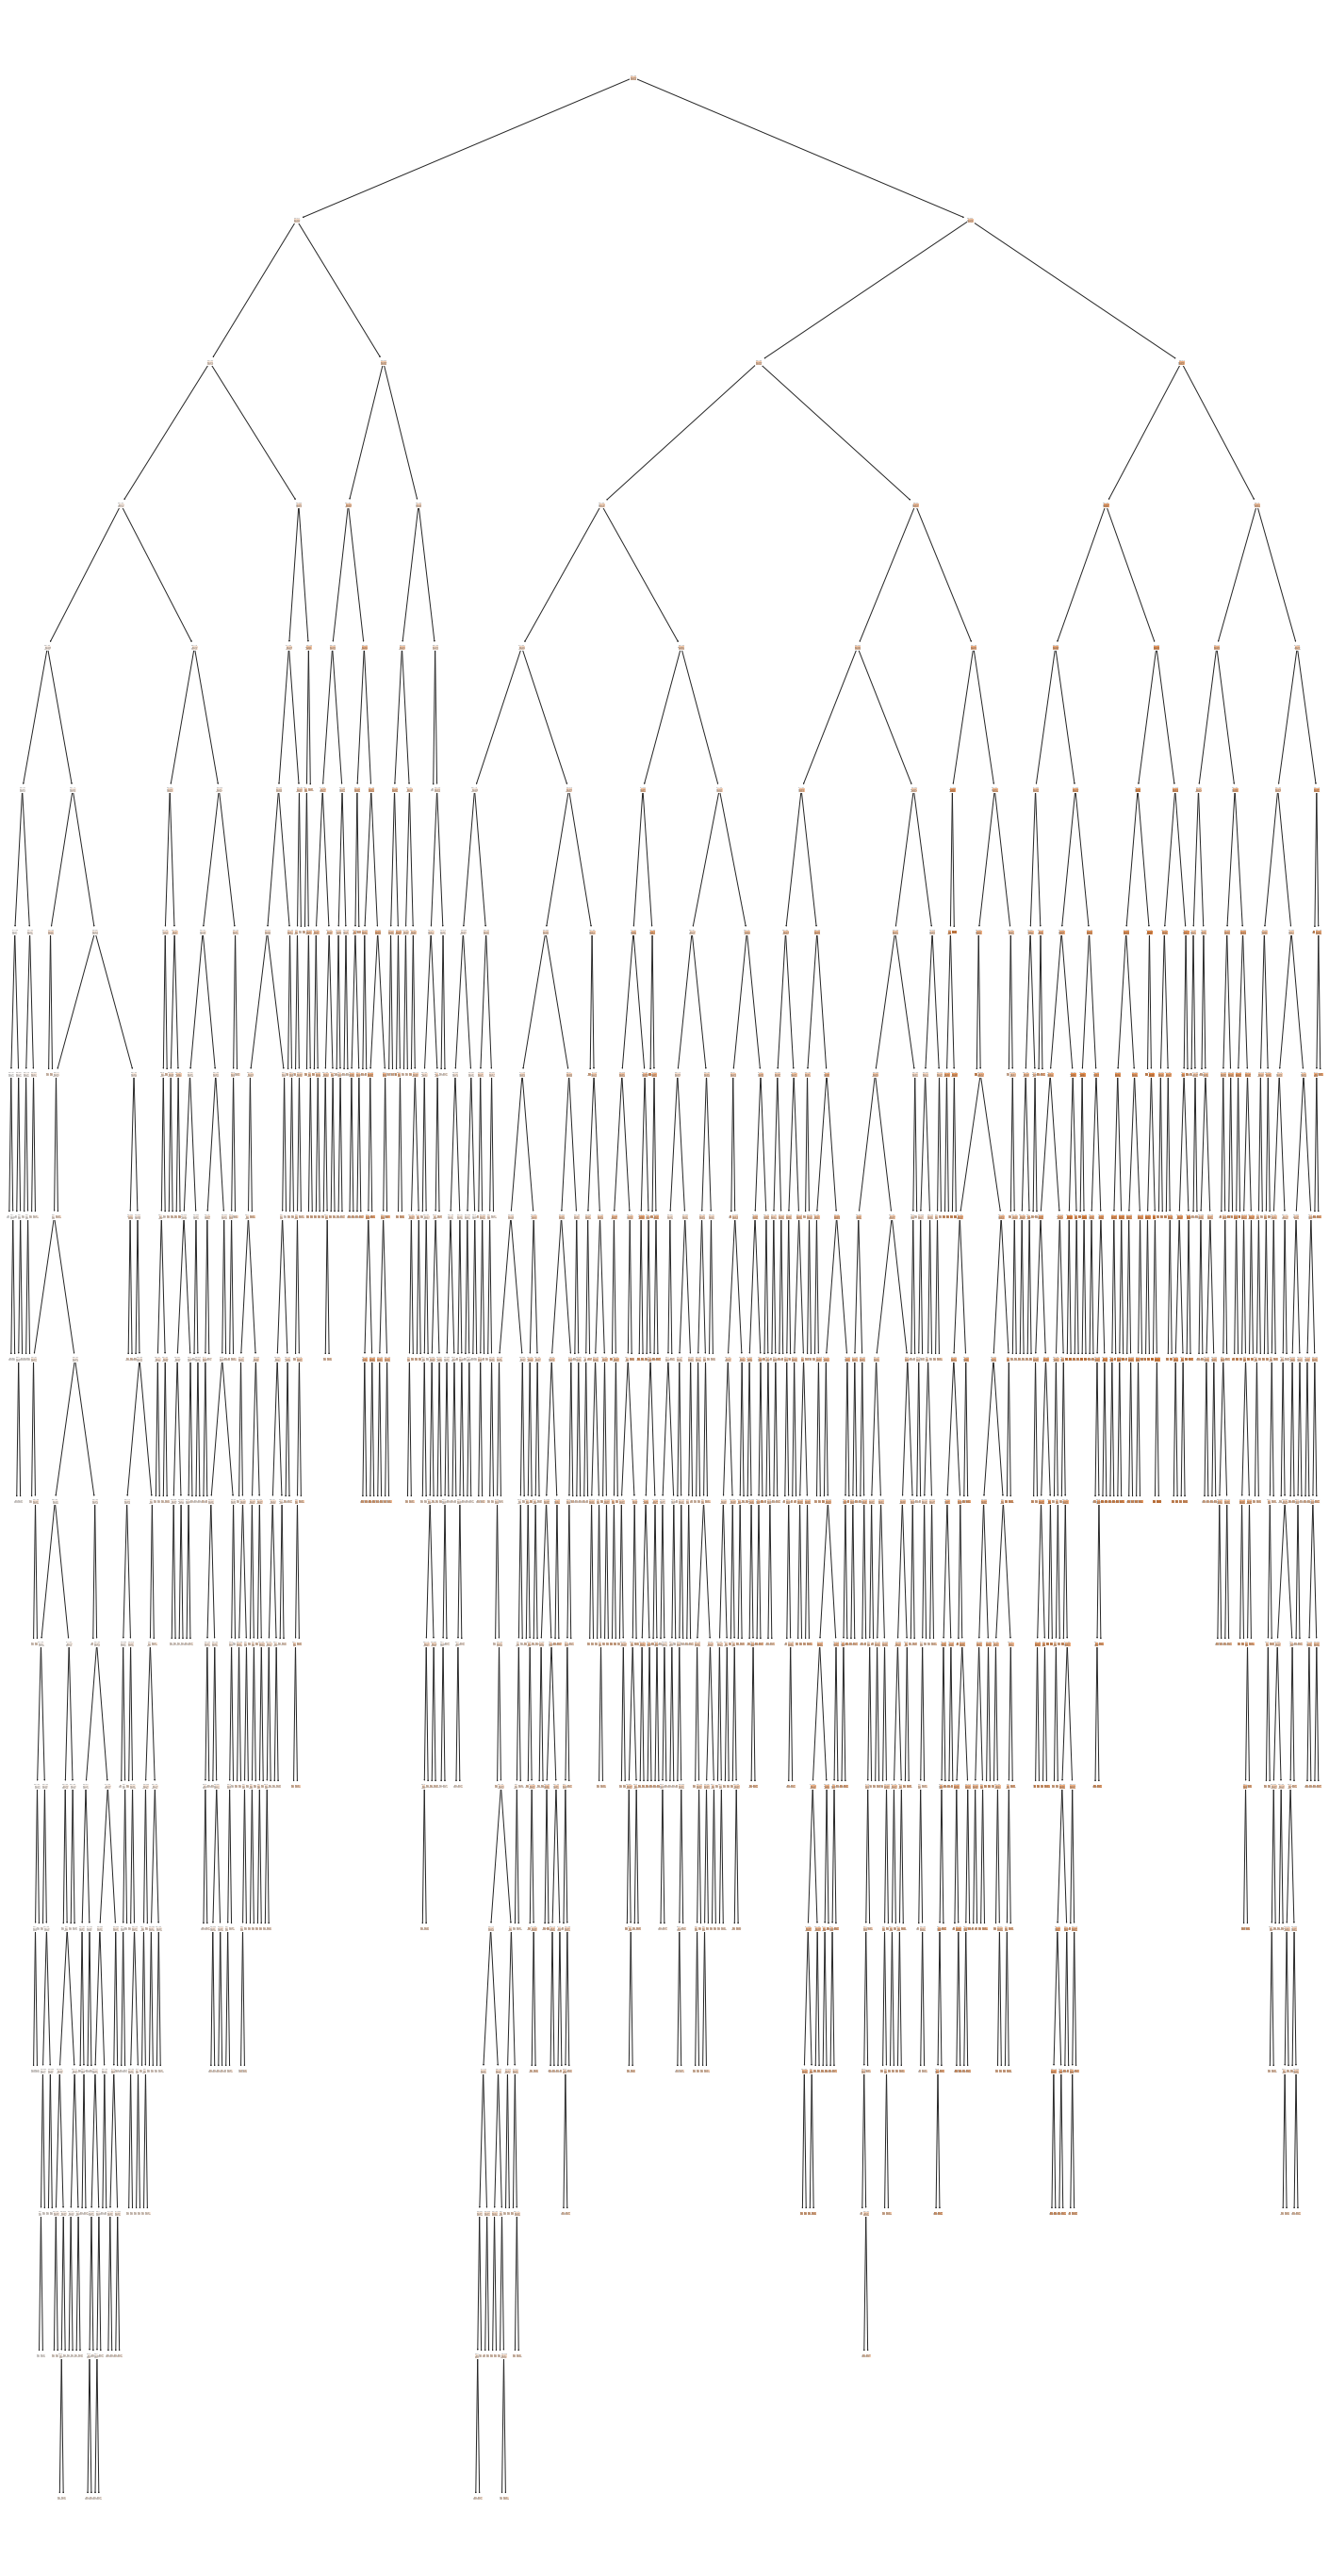

In [13]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,50))
_ = plot_tree(decision_tree_regressor,
              filled=True)

### A slightly nicer (I hope - as I spent a bit too much time on it!) visualisation...

#### First let's put things in order...

In [14]:
numberlist = []
for i in range(len(y_test)):
    numberlist.append(i)
vector_numbers = np.array(numberlist)

list = [] 
for i in range(len(y_test)):
    two_list = [DTR_y_pred[i],np.array(y_test)[i]]
    list.append(two_list)

ordered_list = sorted(list,key=lambda x: x[0]) 

ordered_DTR_y_pred_as_list = []
for i in range(len(y_test)):
    ordered_DTR_y_pred_as_list.append(ordered_list[i][0])
ordered_DTR_y_pred = np.array(ordered_DTR_y_pred_as_list)

ordered_y_test_as_list = []
for i in range(len(y_test)):
    ordered_y_test_as_list.append(ordered_list[i][1])
ordered_y_test = np.array(ordered_y_test_as_list)


#### Ready now for the plotting...

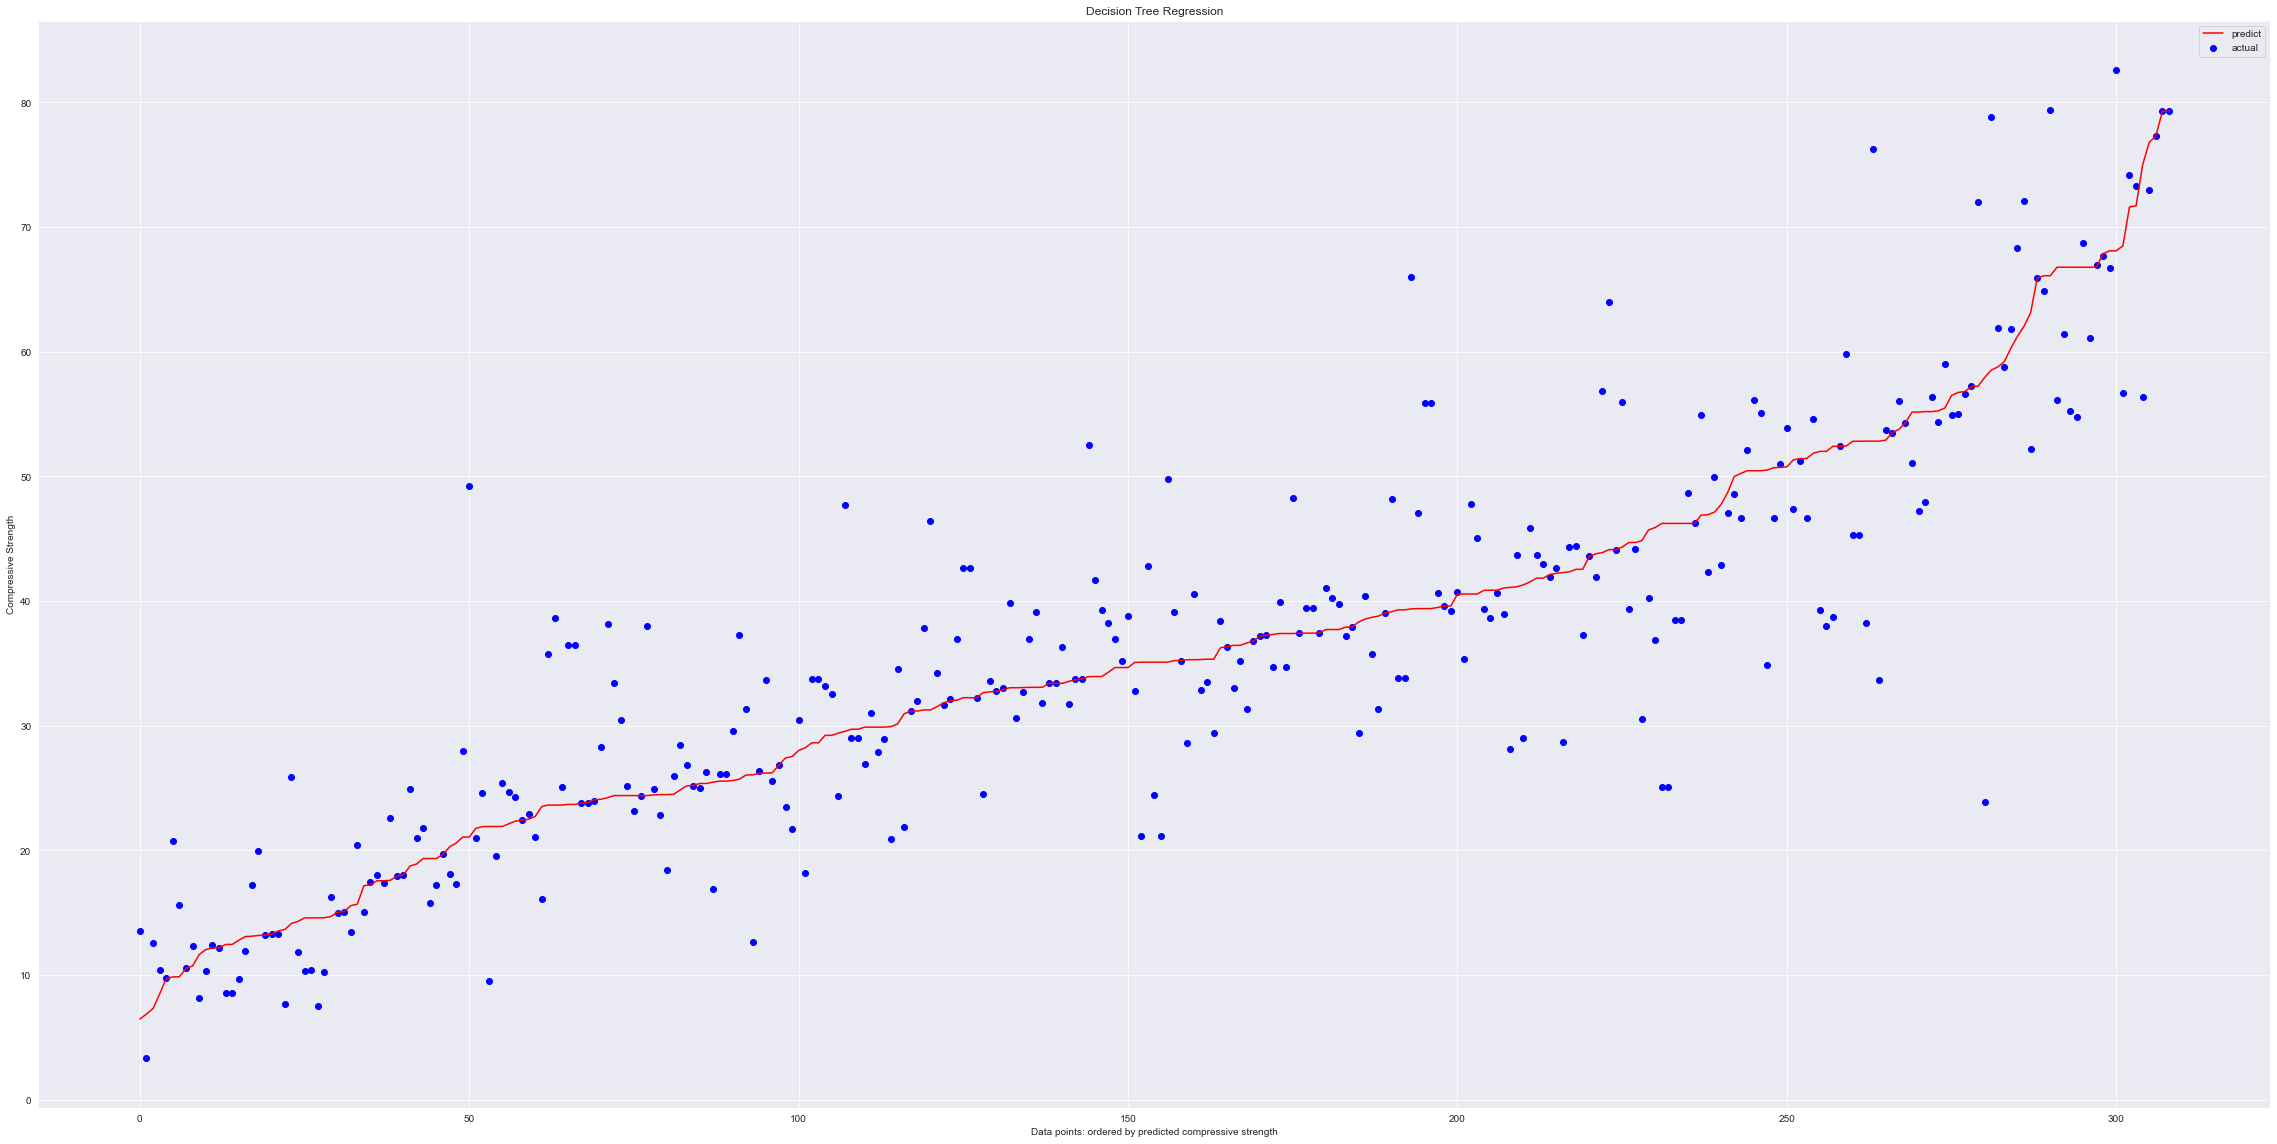

In [15]:
plt.figure(figsize=(40,20))
plt.scatter(vector_numbers, ordered_y_test, c="blue", label="actual")
plt.plot(vector_numbers, ordered_DTR_y_pred, color="red", label="predict")
plt.ylabel("Compressive Strength")
plt.xlabel("Data points: ordered by predicted compressive strength")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### The graph basically shows that the model is not terrible. Most of the actual values are clusted near the 'steppy' line of prediction. Though there do seem to be quite a few outliers - i.e. points that are a distance above or below the line. In any case let's do some more evaluation...

### Mean Squared Error

In [16]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, DTR_y_pred))

55.06510525889968


#### This seems high!

## Neural Network



### Import, Initiate, Add Layers, Compile and Train

In [17]:
import tensorflow as tf
nn_reg = tf.keras.models.Sequential()
nn_reg.add(tf.keras.layers.Dense(units=6, activation='relu')) #first hidden layer
nn_reg.add(tf.keras.layers.Dense(units=6, activation='relu')) #second hidden layer
nn_reg.add(tf.keras.layers.Dense(units=1, activation='linear')) #output layer
nn_reg.compile(loss='mse', optimizer='adam')
nn_reg.fit(Xs_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
73/73 [==============================] - 1s 881us/step - loss: 1559.8812
Epoch 2/100
73/73 [==============================] - 0s 759us/step - loss: 1532.2946
Epoch 3/100
73/73 [==============================] - 0s 840us/step - loss: 1499.5760
Epoch 4/100
73/73 [==============================] - 0s 729us/step - loss: 1435.7422
Epoch 5/100
73/73 [==============================] - 0s 724us/step - loss: 1312.0104
Epoch 6/100
73/73 [==============================] - 0s 626us/step - loss: 1131.3065
Epoch 7/100
73/73 [==============================] - 0s 649us/step - loss: 912.8309
Epoch 8/100
73/73 [==============================] - 0s 637us/step - loss: 704.7814
Epoch 9/100
73/73 [==============================] - 0s 637us/step - loss: 545.4570
Epoch 10/100
73/73 [==============================] - 0s 651us/step - loss: 442.4075
Epoch 11/100
73/73 [==============================] - 0s 623us/step - loss: 370.9358
Epoch 12/100
73/73 [==============================] - 0s 678us/step 

## Predict

In [18]:
nn_reg_y_pred = nn_reg.predict(Xs_test)

10/10 [==============================] - 0s 635us/step


## Mean Squared Error

In [19]:
print(mean_squared_error(y_test, nn_reg_y_pred))

112.96984039092986


### It's worse than the Decision Tree Regressor. So let's try to improve. Increase the nodes! Increase the hidden layers!

In [20]:
nn_reg_two = tf.keras.models.Sequential()
nn_reg_two.add(tf.keras.layers.Dense(units=20, activation='relu')) 
nn_reg_two.add(tf.keras.layers.Dense(units=30, activation='relu')) 
nn_reg_two.add(tf.keras.layers.Dense(units=30, activation='relu')) 
nn_reg_two.add(tf.keras.layers.Dense(units=20, activation='relu')) 
nn_reg_two.add(tf.keras.layers.Dense(units=1, activation='linear')) 
nn_reg_two.compile(loss='mse', optimizer='adam')
nn_reg.fit(Xs_train, y_train, batch_size=10, epochs=1000)

Epoch 1/1000
73/73 [==============================] - 0s 651us/step - loss: 92.8955
Epoch 2/1000
73/73 [==============================] - 0s 595us/step - loss: 92.0529
Epoch 3/1000
73/73 [==============================] - 0s 595us/step - loss: 91.7121
Epoch 4/1000
73/73 [==============================] - 0s 597us/step - loss: 91.0023
Epoch 5/1000
73/73 [==============================] - 0s 609us/step - loss: 90.3354
Epoch 6/1000
73/73 [==============================] - 0s 609us/step - loss: 89.6765
Epoch 7/1000
73/73 [==============================] - 0s 581us/step - loss: 89.2054
Epoch 8/1000
73/73 [==============================] - 0s 581us/step - loss: 88.6065
Epoch 9/1000
73/73 [==============================] - 0s 581us/step - loss: 87.7688
Epoch 10/1000
73/73 [==============================] - 0s 581us/step - loss: 87.2051
Epoch 11/1000
73/73 [==============================] - 0s 609us/step - loss: 86.5317
Epoch 12/1000
73/73 [==============================] - 0s 581us/step - los

In [21]:
nn_reg_two_y_pred = nn_reg_two.predict(Xs_test)

10/10 [==============================] - 0s 776us/step


In [22]:
print(mean_squared_error(y_test, nn_reg_two_y_pred))

1561.3077526174175


#### Nope. Interesting though.

In [34]:
from sklearn.model_selection import cross_val_score
decision_tree_regressor_for_k_fold = DecisionTreeRegressor()
DTR_scores = cross_val_score(decision_tree_regressor_for_k_fold, Xs, y, cv=10) #k=10, i.e. 10 k-folds
print(DTR_scores)

[-0.59884148  0.53969328 -0.05171409  0.56651947  0.13796138  0.54173119
  0.70645792  0.69879323  0.9209833   0.91193897]


In [62]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
nn_mses = []
for train, test in kf.split(Xs, y):
    kfold_nn = tf.keras.models.Sequential()
    kfold_nn.add(tf.keras.layers.Dense(units=6, activation='relu')) #first hidden layer
    kfold_nn.add(tf.keras.layers.Dense(units=6, activation='relu')) #second hidden layer
    kfold_nn.add(tf.keras.layers.Dense(units=1, activation='linear')) #output layer
    kfold_nn.compile(loss='mse', optimizer='adam')
    Xs_trainy = Xs[train]
    y_trainy = y[train]
    Xs_testy = Xs[test]
    y_testy = y[test]
    kfold_nn.fit(Xs_trainy, y_trainy, batch_size=10, epochs=100) 
    kfold_nn_pred = nn_reg.predict(Xs_testy)
    nn_mses.append(mean_squared_error(y_testy, kfold_nn_pred))
for entry in nn_mses:
    print(entry)
print("average: ")
print(sum(nn_mses)/len(nn_mses))


Epoch 1/100
83/83 [==============================] - 1s 666us/step - loss: 1302.9642
Epoch 2/100
83/83 [==============================] - 0s 636us/step - loss: 1283.0455
Epoch 3/100
83/83 [==============================] - 0s 657us/step - loss: 1255.5605
Epoch 4/100
83/83 [==============================] - 0s 650us/step - loss: 1211.7905
Epoch 5/100
83/83 [==============================] - 0s 666us/step - loss: 1141.8380
Epoch 6/100
83/83 [==============================] - 0s 633us/step - loss: 1038.6211
Epoch 7/100
83/83 [==============================] - 0s 620us/step - loss: 901.3419
Epoch 8/100
83/83 [==============================] - 0s 620us/step - loss: 744.3019
Epoch 9/100
83/83 [==============================] - 0s 608us/step - loss: 592.0643
Epoch 10/100
83/83 [==============================] - 0s 608us/step - loss: 465.3166
Epoch 11/100
83/83 [==============================] - 0s 644us/step - loss: 373.3408
Epoch 12/100
83/83 [==============================] - 0s 632us/step 

In [64]:
DTR_kf = KFold(n_splits=5)
DTR_mses = []
for train, test in kf.split(Xs, y):
    kf_decision_tree_regressor = DecisionTreeRegressor()
    Xs_trainy = Xs[train]
    y_trainy = y[train]
    Xs_testy = Xs[test]
    y_testy = y[test]
    kf_decision_tree_regressor.fit(Xs_train, y_train)
    kf_DTR_pred = kf_decision_tree_regressor.predict(Xs_testy)
    DTR_mses.append(mean_squared_error(y_testy, kf_DTR_pred))
for entry in DTR_mses:
    print(entry)
print("average: ")
print(sum(DTR_mses)/len(DTR_mses))

25.207960194174756
20.79043203883495
22.818628883495144
7.823456796116504
11.376517475728157
average: 
17.603399077669906
